**ИУ5-63Б Кузнецов В.А.**

Вариант 9: задача 2, набор данных 1

**Задача 2**

1) Для заданного набора данных проведите обработку пропусков в данных для одного категориального и одного количественного признака.

2) Какие способы обработки пропусков в данных для категориальных и количественных признаков Вы использовали?

3) Какие признаки Вы будете использовать для дальнейшего построения моделей машинного обучения и почему?

# Обработка

**Набор данных**
**scikit-learn iris**

sepal length - длина наружной доли околоцветника

sepal width - ширина наружной доли околоцветника

petal length - длина внутренней доли околоцветника

petal width - ширина внутренней доли околоцветника

target - тип ирисов (Iris setosa, Iris virginica, Iris versicolor)

In [137]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [139]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [140]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

## Добавим необходимые для задания пропуски

In [141]:
np.random.seed(921)
n_missing_values = 30

In [142]:
missing_values_indices = np.random.choice(data.index, n_missing_values, replace=False)
data.loc[missing_values_indices, 'sepal length (cm)'] = np.nan

In [143]:
missing_species_indices = np.random.choice(data.index, n_missing_values, replace=False)
data.loc[missing_species_indices, 'target'] = np.nan

In [144]:
data.isnull().sum()

sepal length (cm)    30
sepal width (cm)      0
petal length (cm)     0
petal width (cm)      0
target               30
dtype: int64

## Обработка числового признака

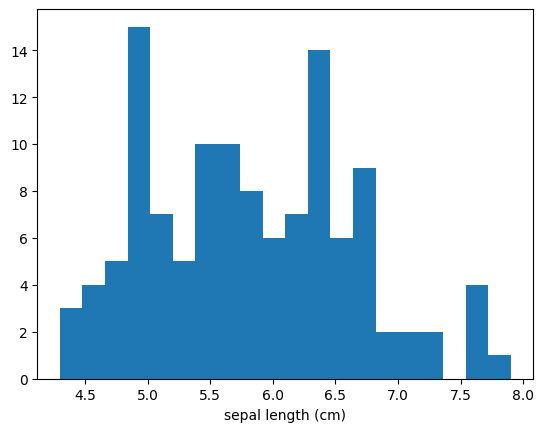

In [145]:
plt.hist(data['sepal length (cm)'], 20)
plt.xlabel('sepal length (cm)')
plt.show()

В распределении не видно явного перекоса, поэтому для обработки пропуском воспользуемя заполнением средним значением.

In [146]:
from sklearn.impute import SimpleImputer
imp_num = SimpleImputer(strategy='mean')
data['sepal length (cm)'] = imp_num.fit_transform(data[['sepal length (cm)']])

## Обработка категориального признака

In [147]:
data = data.dropna(axis=0, how='any')

In [148]:
data.shape

(120, 5)

In [149]:
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

# Объяснение

Числовой признак *sepal length (cm)* имел достаточно равномерное распределение, поэтому я воспользовался заполнением средним значением.

В данном наборе данных был только один категориальный признак - целевой. Учитывая, что этот набор данных создан для обучения моделей классификации, заполнение целевого признака может сильно повлиять на модель. Я решил, что будет лучше удалить пропущенные значения.

# Построение модели

В данном набре данных мало признаков и все они связанны с целевым признаком - классом ирисов. Поэтому для дальнейшего построения модели классификации я бы использовал все имеющиеся признаки. Если отойти от изначальной задумки датасета и делать модель для предсказания признаков, то стоило бы ещё воспользоваться one-hot кодированием класса ирисов.

# Доп. задание для группы ИУ5-63Б

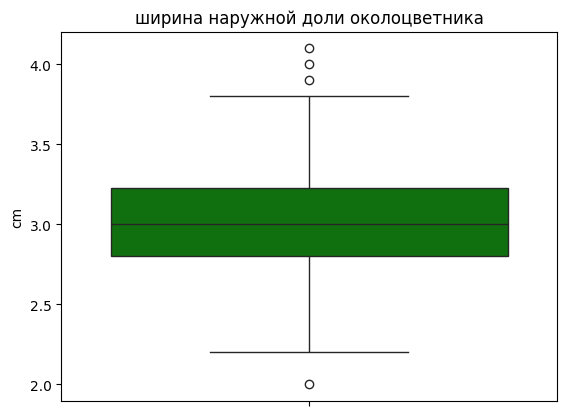

In [154]:
sns.boxplot(y=data['sepal width (cm)'], color='green')
plt.title('ширина наружной доли околоцветника')
plt.ylabel('cm')
plt.show()